## Log-Normal Distribution according to PYMC3

\begin{equation*}
\begin{aligned}
    Y & \sim \mathcal{LogN}(\mu, \tau) \\
    f(y) & = \frac{1}{y} \sqrt{\frac{\tau}{2\pi}} exp\left( -\frac{\tau}{2} (log(y) - \mu)^2 \right) \\
    m & = exp\left( \mu + \frac{1}{2\tau} \right) \\
    \sigma^2 & = \left( exp\left(\frac{1}{\tau} \right) - 1 \right) exp\left( 2\mu + \frac{1}  {\tau}\right) \\
    \mu & = log \left( \frac{m}{\sqrt{\frac{\sigma^2}{m^2}} + 1} \right)  \\
    \tau & = \frac{1}{log\left( \frac{\sigma^2}{m^2} + 1 \right)}
\end{aligned}
\end{equation*}

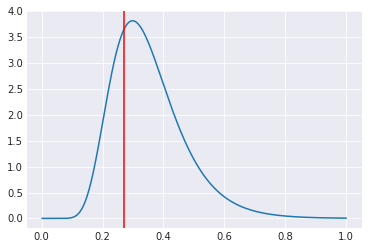

0.35150029401795496


In [45]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
plt.style.use('seaborn-darkgrid')
x = np.linspace(0.001, 1, 1000)
mean = 0.352
sd =  0.012
scale_var = 100
goal = 0.27

def log_normal(x, m, sd):
    mu = np.log(m / np.sqrt(1 + (sd/m)**2))
    tau = 1 / np.log(1 + (sd/m)**2)
    return (1/x)*np.sqrt(0.5*tau/np.pi)*np.exp(-0.5*tau*(np.log(x)-mu)**2)

pdf = log_normal(x, mean, sd*np.sqrt(scale_var))
plt.plot(x, pdf)
plt.axvline(x=goal, c='red')
plt.show()

print(np.mean(x*pdf))